The last three filters did not work as expected, may due to the lost of spacial data. 

Hereby we try to apply the technique on r = 0~0.5R and 0.5R~1R to filter again.

Aiming at limiting two dots features and noises. 

In [1]:
from os import walk
import numpy as np
import cv2
import scipy as scipy
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
from astropy.io import fits
import polarTransform
from astropy.utils.data import get_pkg_data_filename
from scipy.stats import wasserstein_distance

from marvin.tools import Maps

from tqdm import tqdm
import Bicone_Classifier


[INFO]: No release version set. Setting default to DR17
[WARNING]: path /Users/runquanguan/sas/mangawork/manga/spectro/redux/v3_1_1/drpall-v3_1_1.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /Users/runquanguan/sas/mangawork/manga/spectro/analysis/v3_1_1/3.1.0/dapall-v3_1_1-3.1.0.fits cannot be found. Setting dapall to None. (MarvinUserWarning)
[WARNING]: Passing field metadata as keyword arguments is deprecated. Use the explicit `metadata=...` argument instead. Additional metadata: {'location': 'view_args'} (RemovedInMarshmallow4Warning)
[WARNING]: The 'missing' argument to fields is deprecated. Use 'load_default' instead. (RemovedInMarshmallow4Warning)


## FT on limited radius

PATH = '/Users/runquanguan/Documents/Research/MaNGA-AGN/Pipeline&Instrction/obvious_bicone_feature_position.fits'
hdul = fits.open(PATH)
hdu = hdul[1].data['plateifu']

for data in hdu[0:20]:
        BC_EW_hist = Bicone_Classifier.generate_profile_histogram(data)[0]

        yf = np.abs(fft(BC_EW_hist))[1:30]
        peak_value = max(yf)
        peak_index = list(yf).index(peak_value)
        plt.plot(yf)
        yf.sort()
        loss = sum(np.diff(yf[-4:]))
        print(loss)


        plt.show()

[WARNING]: unclosed file <_io.FileIO name='/Users/runquanguan/Documents/bicone_candidates_v3.fits' mode='rb' closefd=True> (ResourceWarning)


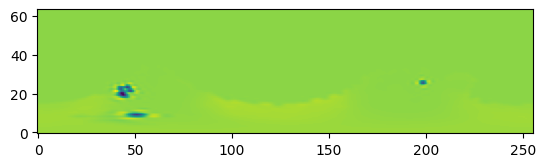

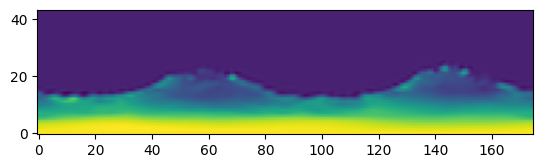

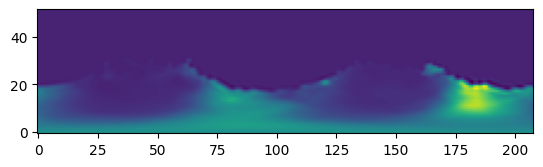

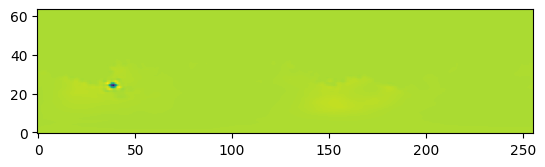

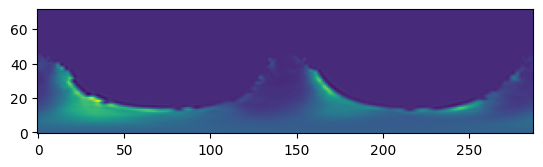

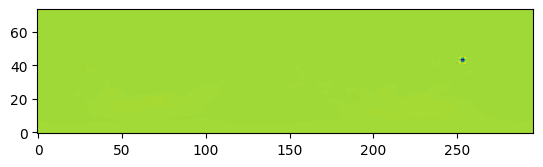

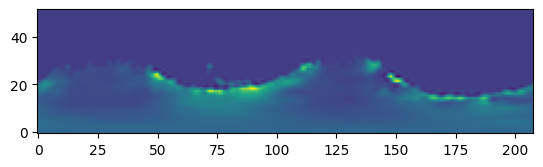

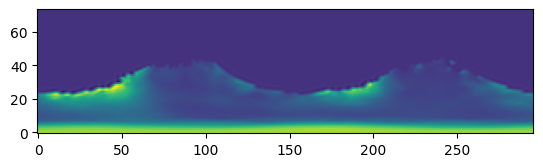

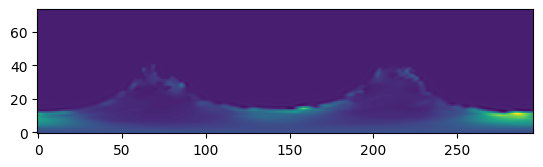

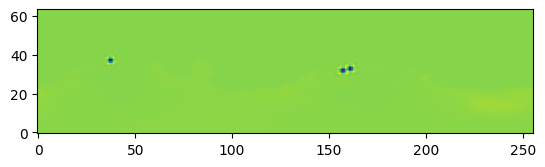

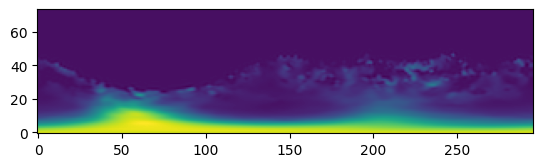

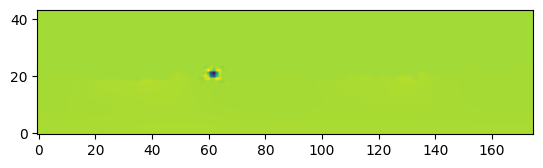

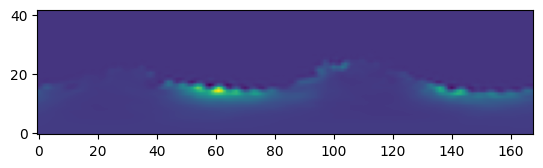

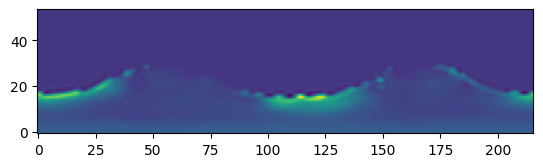

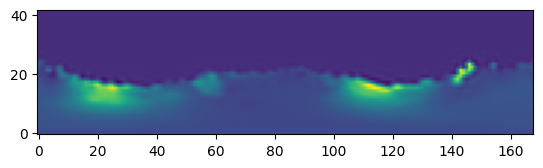

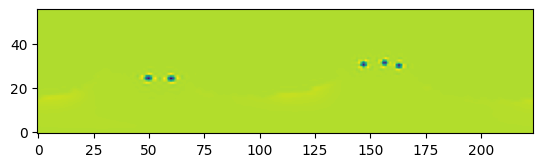

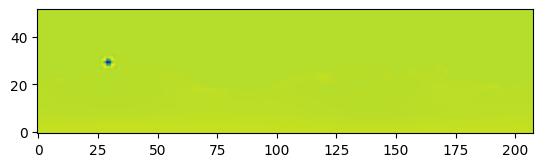

In [49]:
PATH = '/Users/runquanguan/Documents/Research/MaNGA-AGN/Pipeline&Instrction/obvious_bicone_feature_position.fits'
hdul = fits.open(PATH)
hdu = hdul[1].data['plateifu']

for data in hdu:
        # Load OIII MAPS from SDSS-MARVIN server
        maps = Maps(data, bintype='SPX', template='MILESHC-MASTARSSP')
        oiii_ew = maps.emline_gew_oiii_5008.value

        # Transform to polar coordinate

        # Set center of image(just in case)
        w = oiii_ew.shape[0]
        h = oiii_ew.shape[1]


        r1 = 0
        r2 = round(w/2)

        polarImage, ptSettings = polarTransform.convertToPolarImage(oiii_ew, 
                                                                #initialRadius=r1, finalRadius=r2, 
                                                                center=[round(w/2), round(h/2)])
        #yf = np.abs(fft(BC_EW_hist))[1:20]
        #peak_value = max(yf)
        #peak_index = list(yf).index(peak_value)
        plt.figure()
        plt.imshow(polarImage.T, origin='lower')
        #yf.sort()
        #loss = sum(np.diff(yf[-4:]))

        plt.show()

HEADER_PATH = '/Users/runquanguan/Documents/bicone_candidates_v3.fits'
hdul = fits.open(HEADER_PATH)
hdu = hdul[1].data
plateifu = hdu['PLATEIFU']

for data in plateifu[0:20]:
        BC_EW_hist = Bicone_Classifier.generate_profile_histogram(data)[0]

        yf = np.abs(fft(BC_EW_hist))[1:30]
        peak_value = max(yf)
        peak_index = list(yf).index(peak_value)
        plt.plot(yf)
        yf.sort()
        loss = sum(np.diff(yf[-4:]))
        print(loss)

        plt.show()

[WARNING]: unclosed file <_io.FileIO name='/Users/runquanguan/Documents/bicone_candidates_v3.fits' mode='rb' closefd=True> (ResourceWarning)


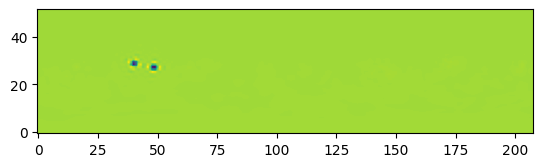

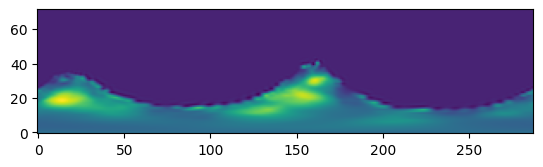

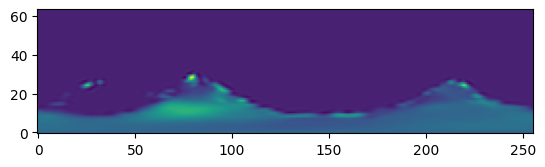

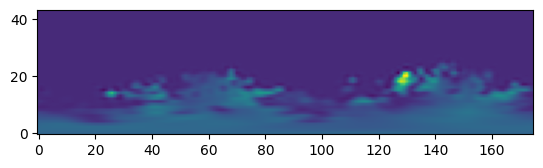

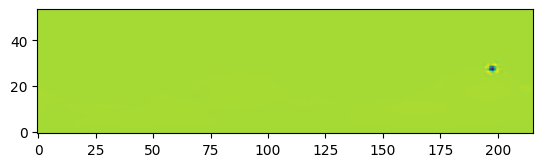

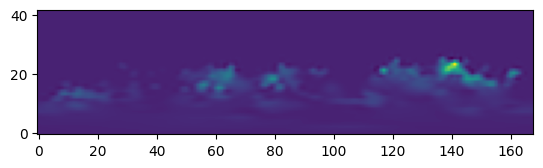

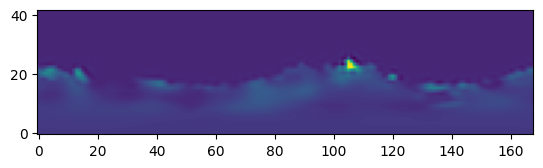

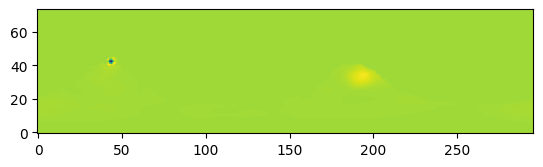

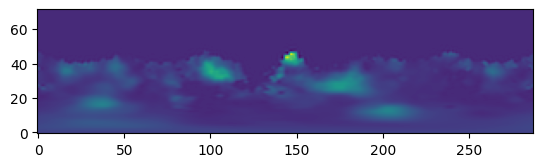

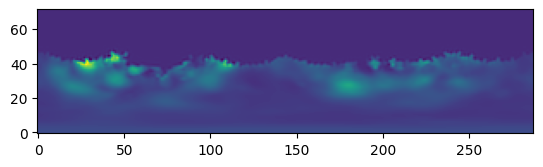

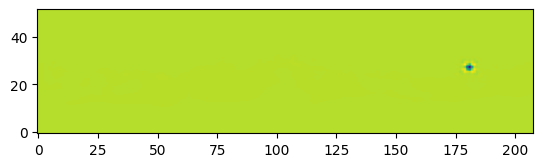

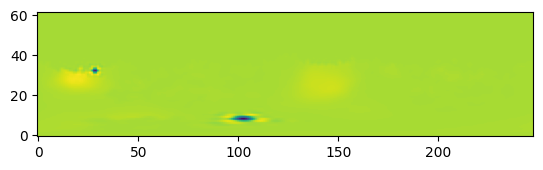

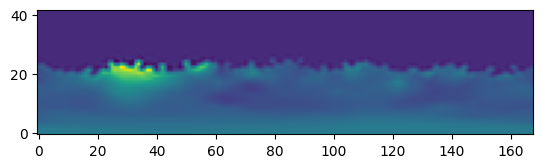

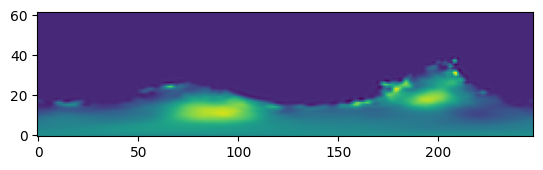

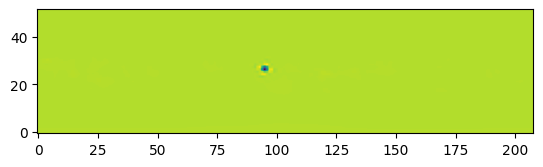

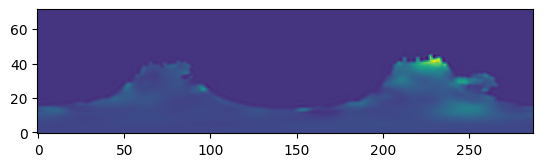

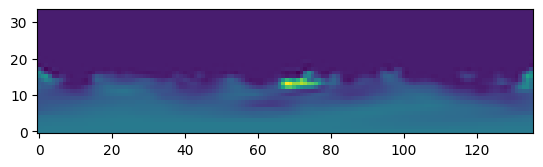

KeyboardInterrupt: 

In [48]:
HEADER_PATH = '/Users/runquanguan/Documents/bicone_candidates_v3.fits'
hdul = fits.open(HEADER_PATH)
hdu = hdul[1].data
plateifu = hdu['PLATEIFU']

for data in plateifu[100:120]:
        # Load OIII MAPS from SDSS-MARVIN server
        maps = Maps(data, bintype='SPX', template='MILESHC-MASTARSSP')
        oiii_ew = maps.emline_gew_oiii_5008.value

        # Transform to polar coordinate

        # Set center of image(just in case)
        w = oiii_ew.shape[0]
        h = oiii_ew.shape[1]


        r1 = 0
        r2 = round(w/2)

        polarImage, ptSettings = polarTransform.convertToPolarImage(oiii_ew, 
                                                                #initialRadius=r1, finalRadius=r2, 
                                                                center=[round(w/2), round(h/2)])
        #yf = np.abs(fft(BC_EW_hist))[1:20]
        #peak_value = max(yf)
        #peak_index = list(yf).index(peak_value)
        plt.figure()
        plt.imshow(polarImage.T, origin='lower')
        #yf.sort()
        #loss = sum(np.diff(yf[-4:]))

        plt.show()

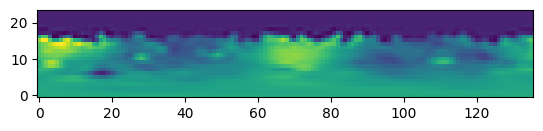

In [46]:
plateifu = '7990-1901'

# Load OIII MAPS from SDSS-MARVIN server
maps = Maps(plateifu, bintype='SPX', template='MILESHC-MASTARSSP')
oiii_ew = maps.emline_gew_oiii_5008.value

# Transform to polar coordinate

# Set center of image(just in case)
w = oiii_ew.shape[0]
h = oiii_ew.shape[1]


r1 = 0
r2 = round(w/2)

polarImage, ptSettings = polarTransform.convertToPolarImage(oiii_ew, 
                                                            initialRadius=r1, finalRadius=r2, 
                                                            center=[round(w/2), round(h/2)])
#yf = np.abs(fft(BC_EW_hist))[1:20]
#peak_value = max(yf)
#peak_index = list(yf).index(peak_value)
plt.figure()
plt.imshow(polarImage.T, origin='lower')
#yf.sort()
#loss = sum(np.diff(yf[-4:]))

plt.show()